Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[Arkadz Kirshtein](https://math.tufts.edu/people/facultyKirshtein.htm) <arkadz.kirshtein@tufts.edu>  
*Summer 2021*

Course material (Class 8): Curve fit
----------------------------------------------------------------

Curve fit: revisiting linear example
====================

Here we are going to consider a more generic algorithm which allows to fit parameters for any data series. 
The underlying approach is based on non-linear least squares, but we are going to use the *curve_fit* function from *scipy.optimize* package. 

Let us revisit the parabola fitting example:
We are given data $x_1,x_2,\dots, x_m$ and $y_1,y_2,\dots,y_m$, and we wish to find coefficients
$\alpha,\beta,\gamma$ such that

$$\alpha {x_i}^2 + \beta x_i + \gamma \approx y_i \quad (1 \le i \le m)$$




In [12]:
import numpy as np
import matplotlib.pyplot as plt

## lists x,y have been populated; lets plot the points
def plot_data(x,y):
    fig, ax = plt.subplots(figsize=(12,6))
    return ax.plot(x,y,"o")

x2=np.array([-9.500506098628847, -9.436078956402293,
             -9.164729339392766, -8.45233138486573, -8.307739104979152,
             -7.828001140674944, -7.705455728811295, -7.571960471086983,
             -6.987892876786192, -6.607031656307571, -6.564029048283118,
             -6.393814384261753, -5.998800384719204, -5.7183134001218345,
             -5.560757660996165, -5.313898241447623, -5.180315921867592,
             -4.703049758011512, -4.65291534750819, -4.636925028892335,
             -4.473995832831181, -4.349582934094259, -4.276820618215415,
             -3.9856919476729056, -3.3024763695520782, -2.930284450264594,
             -2.460449933651126, -2.388066289115109, -2.3869772995550846,
             -2.382172607813456, -2.282647403270765, -2.2514206929597433,
             -2.2151987854220563, -1.8688379031501547, -1.040037196669891,
             -0.592982419578636, -0.5285061183473907, -0.07469879485638131,
             -0.03672428155128671, 0.08965963140970601, 0.554605101162359,
             1.2625261558731822, 1.3951852942052394, 1.422010962689896,
             1.5779572321503075, 1.5791882604555276, 1.61640050593763,
             1.8955924638126866, 2.4120975394418576, 2.4275213285530626,
             2.640546120143096, 3.118535721592007, 3.7246612880274874,
             3.778405649802931, 3.818590524157603, 3.8965198726985513,
             3.9968635744727568, 4.05853387329822, 4.842259209080241,
             5.2644529452275215, 5.329049050145095, 5.412276483696772,
             5.820060572107913, 5.824669115601578, 6.398794721957497,
             6.4402471330505975, 6.778030229348008, 6.822865684632326,
             7.154884482248647, 7.433033388040794, 7.95313306257955,
             8.542338054047299, 8.67214809353717, 8.695899516122513,
             8.734604130466039, 8.853944058863625, 8.878828934856866,
             9.052318939780356, 9.05661642071038, 9.362282799156798,
             9.610149658359706, 10.214633633482066, 10.307112596020925,
             10.619306436246774, 10.621964709661611, 10.905709588359596,
             11.16622763212822, 11.50521260209901, 11.629057622884542,
             11.753805653041166, 11.807760553764172, 12.170454913700738,
             12.228946860809256, 12.238348904416945, 12.427719333651723,
             13.053306270918945, 14.03578560105586, 14.327026523434942,
             14.636621765165128, 14.744885176800103])


y2=np.array([242.5396610014489, 262.99748345006117,
             236.21962830726534, 203.36741916361822, 204.59490171086318,
             169.55460040120266, 157.45527545110704, 145.4060333613558,
             158.9329865744686, 145.1180030935003, 103.48587998057566,
             90.98530811955919, 115.82927769102031, 98.2457769772088,
             109.86609808439744, 61.132312437676916, 102.58437854309983,
             80.22317148499344, 60.88436606939928, 58.026728933635454,
             67.27333189547187, 83.32681082764311, 47.84696391123863,
             34.55757018595044, 18.228825041017465, -3.45933210037197,
             41.72125747872123, 20.797350275633658, 45.8894100648326,
             -1.5174797860946683, 0.636099698366511, 29.059890341434148,
             2.311482993391394, -3.4171765808344308, 15.63969965759749,
             -12.776680135544654, 23.635189348858646, -18.932585171656093,
             31.934447339913138, -7.254615510171753, -7.447589708144465,
             21.5170767071797, -10.605455001783469, 37.97690993632591,
             -16.28075900816511, 17.514929406199215, -15.41909805330178,
             -9.28169529245514, 1.6114757958711792, -2.772531397475941,
             31.36303821387554, 48.44461813262329, 21.133120624334147,
             55.09416933352425, 46.091773340771034, 32.460057766234485,
             51.29572119122864, 84.45347100398384, 100.91738746516664,
             118.76834790433631, 89.83233547020102, 103.01856200603174,
             127.02275401927923, 126.50985785898953, 106.89953936401625,
             138.03228724012408, 154.39572040750687, 167.11136504224805,
             166.55137233758427, 185.72301536715477, 184.77395051270676,
             252.36187934583052, 226.68621500173575, 207.63736161137572,
             251.34665622040202, 229.428513458754, 247.93401134715828,
             255.26504804394153, 248.81465414128846, 246.64287358721634,
             300.0379742831173, 324.57035644342176, 359.6415758204655,
             354.6547519583311, 343.8702990976892, 372.48584664055744,
             364.8394942502537, 430.1991994902185, 438.6303667250944,
             403.11528216459146, 412.71074061223993, 453.6054297235233,
             478.9207367814926, 481.9332925595611, 450.91801347136175,
             497.7328569627587, 614.3798601360598, 625.8601324671473,
             672.018324952574, 659.0107875019195])


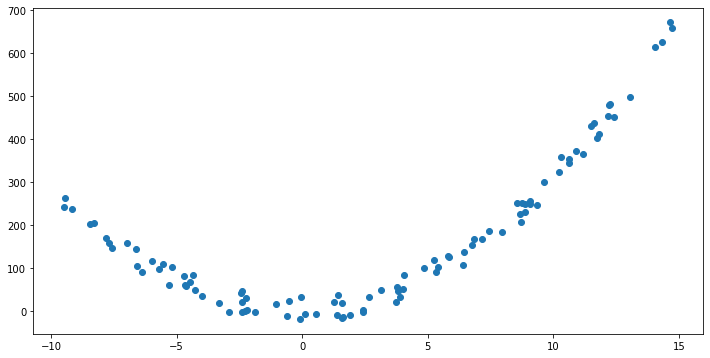

In [13]:
plot_data(x2,y2)

In [14]:
from scipy.optimize import curve_fit

# the model function is going to depend on x 
# and parameters alpha, beta, gamma
f=lambda x, alpha, beta, gamma: alpha*x*x + beta*x + gamma

popt0, pcov0 =curve_fit(f,x2,y2)

alpha, beta, gamma = popt0

print(f"Q(x) = {alpha:.03}*x^2 + {beta:.03}*x + {gamma:.03}")

Q(x) = 2.97*x^2 + 1.19*x + 2.21


(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f34b14d1f60>)

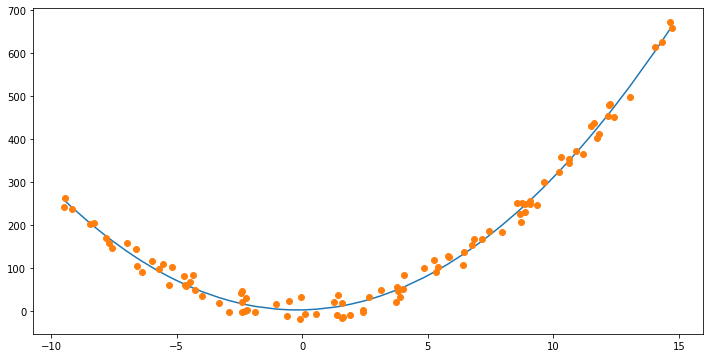

In [15]:
def plot_curve_fit(x0,f,x,y):
    # graph the line with slope alpha and y-intercept beta, and plot the data points
    #
    fig,ax = plt.subplots(figsize=(12,6))
    #ax.plot(x,alpha1*x + beta1)
    ax.plot(x0,f(x0))
    ax.plot(x,y,'o')
    return fig,ax

Q2=lambda x: alpha*x*x + beta*x + gamma

plot_curve_fit(x2,Q2,x2,y2)


This result exactly coincides with that obtained by least squares.

Non-linear population model
========================

Let us reconsider the population model. This time we split the population into male and female species that both last till age of 5. Thus if the total population is described by a vector $p^{(t)}=[m_0^{(t)}, m_1^{(t)}, m_2^{(t)}, m_3^{(t)}, m_4^{(t)}, f_0^{(t)}, f_1^{(t)}, f_2^{(t)}, f_3^{(t)}, f_4^{(t)}]$ the survival is still described by the same relations but now split into male and female sub-species
$$
\begin{array}{rl}
m_1^{(t+1)}= &s_0 m_0^{(t)}\\
m_2^{(t+1)}= &s_1 m_1^{(t)}\\
m_3^{(t+1)}= &s_2 m_2^{(t)}\\
m_4^{(t+1)}= &s_3 m_3^{(t)}\\
f_1^{(t+1)}= &s_0 f_0^{(t)}\\
f_2^{(t+1)}= &s_1 f_1^{(t)}\\
f_3^{(t+1)}= &s_2 f_2^{(t)}\\
f_4^{(t+1)}= &s_3 f_3^{(t)}\\
\end{array}
$$

The birth rate now is dependent on the number of interactions between male and female with a limitation that only species of age 2 and higher can reproduce. And the probability of male/female birth is 50/50. Then the birth relation will take form 
$$
\begin{array}{rl}
f_0^{(t+1)}=m_0^{(t+1)}= &\frac12 (b_{22}m_2^{(t)}f_2^{(t)} + b_{23}m_2^{(t)}f_3^{(t)} + b_{24}m_2^{(t)}f_4^{(t)}\\
 &+b_{32}m_3^{(t)}f_2^{(t)} + b_{33}m_3^{(t)}f_3^{(t)} + b_{34}m_3^{(t)}f_4^{(t)}\\
 &+b_{42}m_4^{(t)}f_2^{(t)} + b_{43}m_4^{(t)}f_3^{(t)} + b_{44}m_4^{(t)}f_4^{(t)})
\end{array}
$$

Remark
------------
A convenient way to implement this reproduction function is using bilinear/quadratic form:
$$
f_0^{(t+1)}=m_0^{(t+1)}=\frac12 
\begin{pmatrix} m_0^{(t)}\\ m_1^{(t)}\\ m_2^{(t)}\\ m_3^{(t)}\\ m_4^{(t)} \end{pmatrix}\cdot
\begin{bmatrix}
0& 0& 0& 0& 0\\
0& 0& 0& 0& 0\\
0& 0& b_{22}& b_{23}& b_{24}\\
0& 0& b_{32}& b_{33}& b_{34}\\
0& 0& b_{42}& b_{43}& b_{44}
\end{bmatrix}
\cdot\begin{pmatrix} f_0^{(t)}\\ f_1^{(t)}\\ f_2^{(t)}\\ f_3^{(t)}\\ f_4^{(t)} \end{pmatrix}
$$

Thus we have total of 13 parameters. (You might decide to consider separate survival rates for males and females, which for now we take the same for simplicity)

Next we assume that we have the total population statistics for a certain number of years and build a model to use *curve_fit* and find these parameters. Let us consider initial population of $1,000,000$ evenly split between ages and genders.

In [5]:
import numpy as np
from scipy.optimize import curve_fit

def year(p,sb):
    S=sb[:4]
    B=np.block([[np.zeros((2,2)), np.zeros((2,3))],
                [np.zeros((3,2)), np.reshape(sb[4:],(3,3))]])
    pn=np.empty(len(p))
    # male aging
    pn[1:5]=S*p[0:4]
    # female aging
    pn[6:10]=S*p[5:9]
    
    birth_rate=np.dot(p[:5],B@p[5:])
    
    #male birth
    pn[0]=0.5*birth_rate
    #female birth
    pn[5]=0.5*birth_rate
    
    return pn


# assume that t contains consecutive years starting with 0
def model(t, *sb):
    sb=np.array(sb)
    p_current=1e5*np.ones(10)
    p_total=np.empty(len(t))
    p_total[0]=p_current.sum()
    for i in range(1,len(t)):
        # to account for overflow let us consider population limit of 1e20
        if (p_current.sum()>1e20) or np.isnan(p_current).any() or np.isinf(p_current).any():
            p_total[i:]=1e20
            break
        
        p_current=year(p_current,sb)
        p_total[i]=p_current.sum()
        
        
    return p_total
    

In [16]:
t=np.arange(20)
p=1e6*np.ones(20)
bounds=(0, [1]*4 + [1e2]*9)
s, pcov=curve_fit(model,t,p,p0=0.01*np.ones(13),bounds=bounds)
print('Survival rates:',s[:4])
print('Birth rates:',np.reshape(s[4:], (3,3)))

Survival rates: [4.58808790e-01 4.95150875e-01 6.46750266e-04 1.86021234e-05]
Birth rates: [[6.17100850e-05 3.04763190e-05 6.96154631e-07]
 [3.04763190e-05 5.80855505e-07 2.57450982e-07]
 [6.96154647e-07 2.57450999e-07 2.56869004e-07]]


(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f34b14d1ba8>)

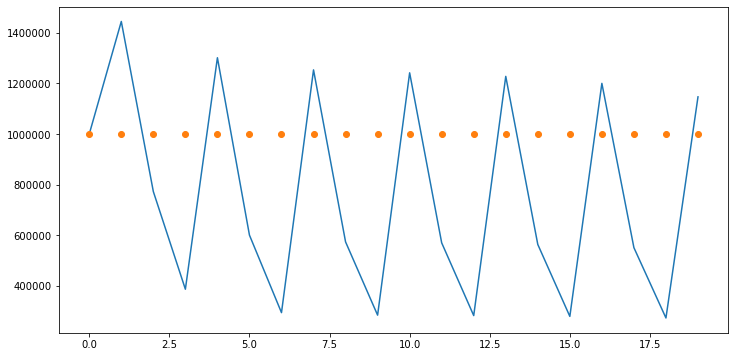

In [17]:
Qp=lambda x: model(x,*s)

plot_curve_fit(t,Qp,t,p)

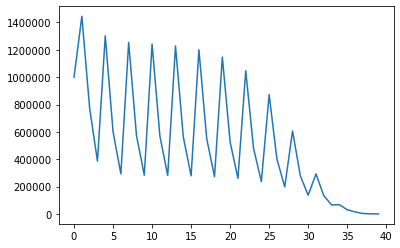

In [18]:
plt.plot(np.arange(40),Qp(np.arange(40)))

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f34b1409cc0>)

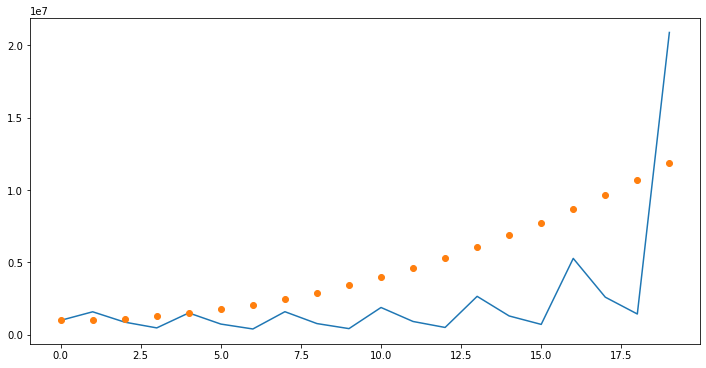

In [19]:
t=np.arange(20)
p=1e6*np.ones(20)+3e4*t**2
bounds=(0, [1]*4 + [1e2]*9)
s, pcov=curve_fit(model,t,p,p0=0.01*np.ones(13),bounds=bounds)
plot_curve_fit(t,Qp,t,p)

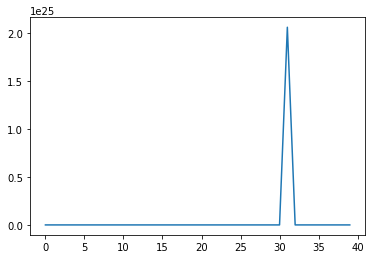

In [24]:
plt.plot(np.arange(40),Qp(np.arange(40)))